In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
size = 1000
x = np.random.normal(loc=0, scale=8, size=size)
y = np.random.normal(loc=0, scale=2, size=size)

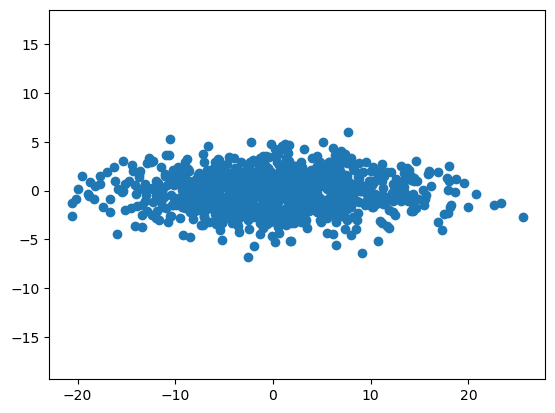

In [5]:
plt.scatter(x, y)
plt.axis('equal')
plt.show()

In [6]:
mean = [0, 0]
cov = [[3, 3], [3, 4]]
size = 500
X = np.random.multivariate_normal(mean=mean, cov=cov, size=size)

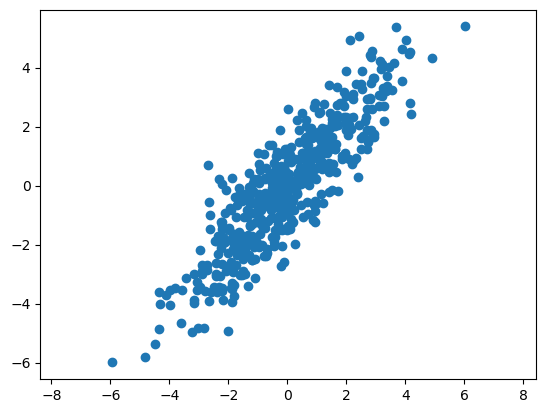

In [7]:
plt.scatter(X[:, 0], X[:, 1])
plt.axis('equal')
plt.show()

In [8]:
X

array([[ 1.50252982e+00,  2.27184785e+00],
       [-1.46883177e+00, -1.08212281e+00],
       [ 2.49110976e-01, -1.96763159e+00],
       [-2.14544316e-01,  6.73072410e-01],
       [-2.33372279e+00,  2.22466623e-01],
       [-1.50382575e+00, -2.47365048e+00],
       [ 2.44409609e+00,  2.04994747e+00],
       [ 1.93053041e+00,  3.16119781e+00],
       [-4.45091654e-02, -6.99164121e-01],
       [ 3.26795215e-02, -1.06665291e-01],
       [-1.02834441e+00, -9.53521985e-01],
       [ 6.96871013e-01,  1.18023985e+00],
       [ 2.14789704e+00,  1.90142905e+00],
       [ 2.35956348e-01, -1.33757390e-01],
       [ 3.37752545e-01, -2.99600964e-01],
       [-3.98553806e+00, -3.55781233e+00],
       [ 6.79251841e-03, -3.65276384e-01],
       [-7.52655037e-01,  2.47982229e-01],
       [ 1.05001956e+00,  1.81929100e+00],
       [-1.75028751e+00, -2.69559051e+00],
       [ 3.18989434e+00,  3.95892599e+00],
       [-4.36730130e-01,  1.83774274e-01],
       [ 2.17686952e+00,  7.45940103e-01],
       [-1.

## normalización de los datos

In [10]:
np.mean(X, axis=0), np.std(X, axis=0)

(array([-0.05631999, -0.08970591]), array([1.82376209, 2.10986341]))

In [11]:
X_std = (X - np.mean(X, axis=0))/np.std(X, axis=0)

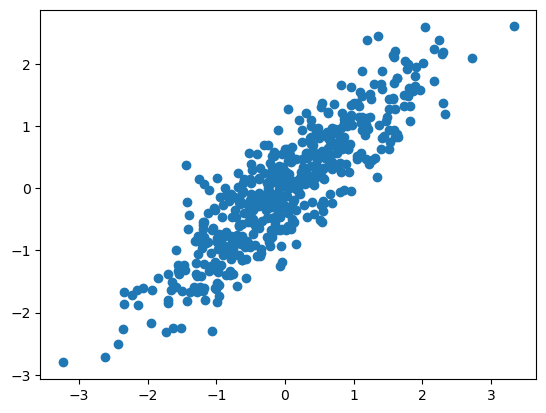

In [12]:
plt.scatter(X_std[:, 0], X_std[:, 1])

# Calculo de la covarianza

In [14]:
X_mean = np.mean(X_std, axis=0)
X_mean

array([ 3.95239397e-17, -2.66453526e-17])

In [15]:
cov_matrix = (X_std - X_mean).T.dot((X_std - X_mean))/(X_std.shape[0]-1)
cov_matrix

array([[1.00200401, 0.88260148],
       [0.88260148, 1.00200401]])

In [16]:
np.cov(X_std.T)

array([[1.00200401, 0.88260148],
       [0.88260148, 1.00200401]])

In [17]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
eig_vals, eig_vecs

(array([0.11940253, 1.88460549]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

# Calculo de valores y vectores propios con la matriz de correlación

In [19]:
corr_matrix = np.corrcoef(X_std.T)
corr_matrix

array([[1.        , 0.88083628],
       [0.88083628, 1.        ]])

In [20]:
eig_vals_corr, eig_vecs_corr = np.linalg.eig(corr_matrix)
eig_vals_corr, eig_vecs_corr

(array([0.11916372, 1.88083628]),
 array([[-0.70710678, -0.70710678],
        [ 0.70710678, -0.70710678]]))

# Singular Value Decomposition

In [22]:
u, s, v = np.linalg.svd(X_std.T)
u

array([[-0.70710678, -0.70710678],
       [-0.70710678,  0.70710678]])

In [23]:
#La longitud de mi vectr es su norma, la norma se calcula así, los cvectores propios siempre deben estar normalizados. 
#Lamda dice quét tan largo es el vector 
# ya que el solo vale 1, el vector unitario nos da las coordenadas del vector.
#El que sean vectores unitarios hace que el peso de la información recaiga en lamda
np.linalg.norm(eig_vecs[0]), np.linalg.norm(eig_vecs[0])

(1.0, 1.0)

In [44]:
np.sum(eig_vals) 

2.0040080160320644

In [46]:
eig_vals

array([0.11940253, 1.88460549])

In [50]:
#Sacar el porcentaje de cada uno de los vectores 
total_sum = np.sum(eig_vals)

val_porc_eig_val_1 = eig_vals[0]/total_sum * 100
val_porc_eig_val_2 = eig_vals[1]/total_sum * 100
val_porc_eig_val_1, val_porc_eig_val_2

(5.958186248085587, 94.0418137519144)

In [54]:
#Para ordenar los valores propios de mayor a menor hcaemos
eig_pairs = [(eig_vals[i], eig_vecs[i]) for i in range(len(eig_vals))]
eig_pairs

[(0.11940253002175527, array([-0.70710678, -0.70710678])),
 (1.884605486010309, array([ 0.70710678, -0.70710678]))]

In [56]:
eig_pairs.sort(reverse=True)
eig_pairs

[(1.884605486010309, array([ 0.70710678, -0.70710678])),
 (0.11940253002175527, array([-0.70710678, -0.70710678]))]

In [66]:
Total_sum = np.sum(eig_vals)

porc_eig = [eig_val/total_sum * 100 for eig_val, _ in eig_pairs]
cum_porc_eig = np.cumsum(porc_eig)
porc_eig, cum_porc_eig

([94.0418137519144, 5.958186248085587], array([ 94.04181375, 100.        ]))

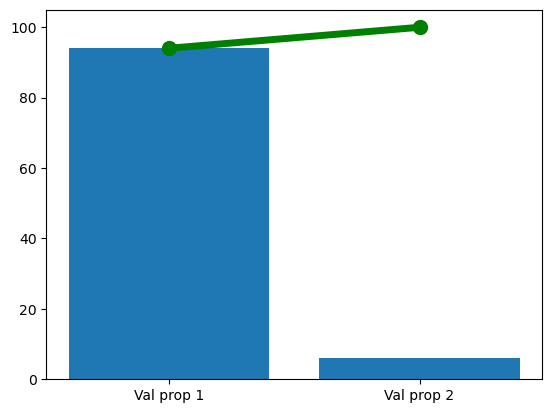

In [72]:
#PLOTS
x =['Val prop 1', 'Val prop 2']
plt.bar(x, porc_eig)
plt.plot(x, cum_porc_eig, '.-', c='green', linewidth=5, markersize=20) 
#Estamos viendo graficamente la longitud porcentual de cada lamda
#La recta de arriba indica hasta donde me permito perder de información.

In [84]:
from sklearn.decomposition import PCA

In [88]:
pca = PCA(n_components=2).fit(X_std)
#PCA es nuestra función
#n_components=2 es la reducción de dimensión
#X_std son los datos

In [90]:
pca.components_, pca.explained_variance_ #metodo o función para hacer la reducción de dimensiones.
#Los vectores propios son los componentes principales.

(array([[-0.70710678, -0.70710678],
        [-0.70710678,  0.70710678]]),
 array([1.88460549, 0.11940253]))